In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_excel("Customer_retention_dataset.xlsx")
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [3]:
# checking the no. of rows and columns in the dataset.
df.shape

(269, 71)

In [4]:
# getting basic info about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [5]:
# using strip() function on the columns' names to get rid of escape characters.
for i in df.columns:
    df.rename(columns={i:i.strip()},inplace=True)

In [7]:
# checking for null values.
df.isnull().sum().sum()

0

In [8]:
# checking for duplicate entries.
df.duplicated().value_counts()
# there are many identical entries but it is not surprising as the dataset has all categorical columns and multiple people may have
# identical views.

True     166
False    103
dtype: int64

In [9]:
df.columns

Index(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

In [10]:
df['7 How do you access the internet while shopping on-line?'].unique()
# the column has two unique values of 'Mobile Internet' and 'Mobile internet'. Both imply same thing.

array(['Dial-up', 'Wi-Fi', 'Mobile Internet', 'Mobile internet'],
      dtype=object)

In [11]:
# replacing one of them with the other.
df['7 How do you access the internet while shopping on-line?'].replace("Mobile internet", "Mobile Internet",inplace=True)
df['7 How do you access the internet while shopping on-line?'].unique()

array(['Dial-up', 'Wi-Fi', 'Mobile Internet'], dtype=object)

In [ ]:
# The dataset has a total of 71 columns.
# The first 17 columns has data to know about the customer, their online shopping methods, devices they use, etc.
# Column 18 to 47 tries to know the customer's viewpoint regarding various parameters like information quality, service quality, etc
# Data in columns 18 to 47 has 5 unique values: 'Strongly agree (5)','Agree (4)','Indifferent (3)','Dis-agree (2)','Strongly disagree (1)'.
# Column 48 to 71 takes the customer's feedback for different e-commerce websites. It includes amazon,flipkart,myntra,snapdeal,paytm.
# In the questions of column 48 to 71 the customer may choose multiple options from the above mentioned e-commerce sites.

In [ ]:
# Let's see some pie-plots from the first 17 columns.

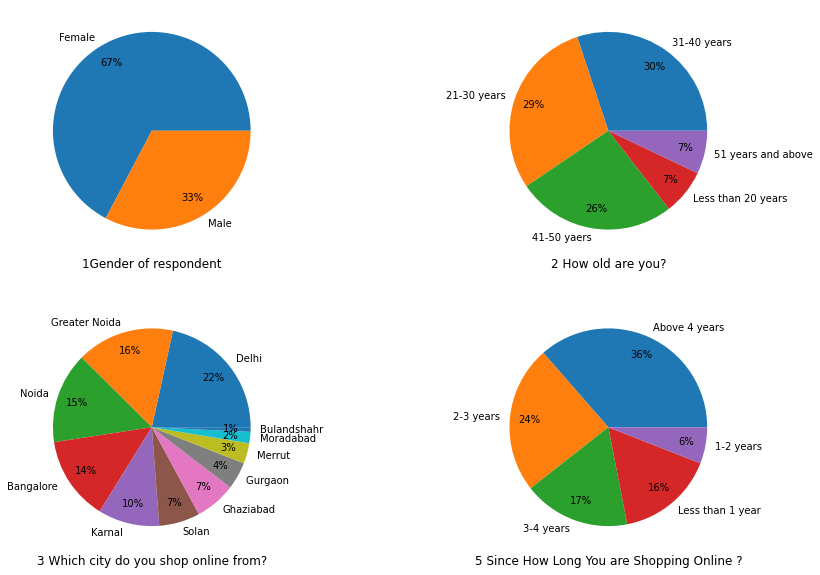

In [12]:
plt.figure(figsize=(15,10))
count=1
for i in enumerate(df.columns[0:5]):
    if i[1]=='4 What is the Pin Code of where you shop online from?':
        continue
    else:
        plt.subplot(2,2,count)
        plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
        plt.xlabel(i[1],fontsize=12)
        count+=1
        
# Observations:
# 1. Majority of respondents are female.
# 2. 85% of the respondents belong to 21-50 years age category.
# 3. A high majority(84%) of the respondents have been shopping online since atleast 1 year.
# 4. Majority of respondents are from tier-1 cities.

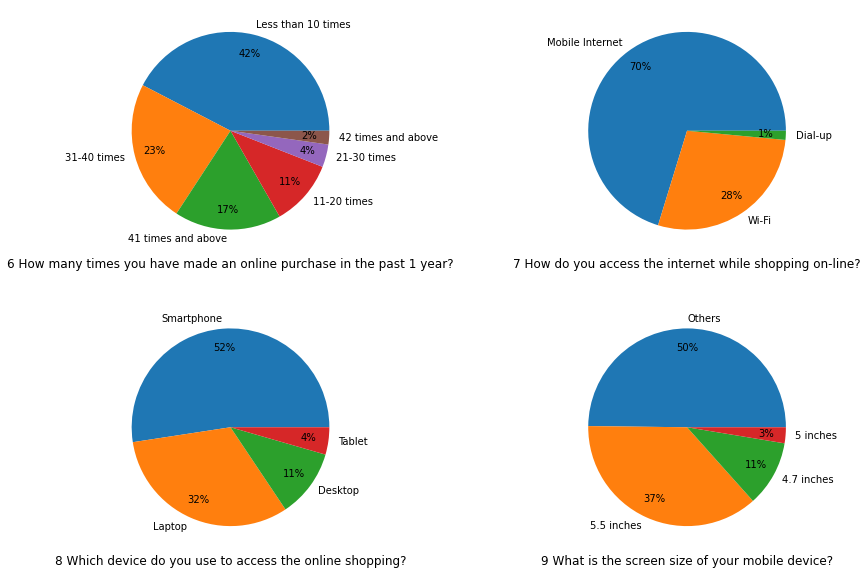

In [13]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[5:9]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=12)
    
# Observations:
# 1. 42% of the respondents have purchased online atleast 30 times in the past 1 year.
# 2. More than half the respondents have purchased less than 20 times in the past 1 year.
# 3. 70% of the respondents use mobile internet connection. 
# 4. More than half the respondents use smartphone to do online purchasing. 

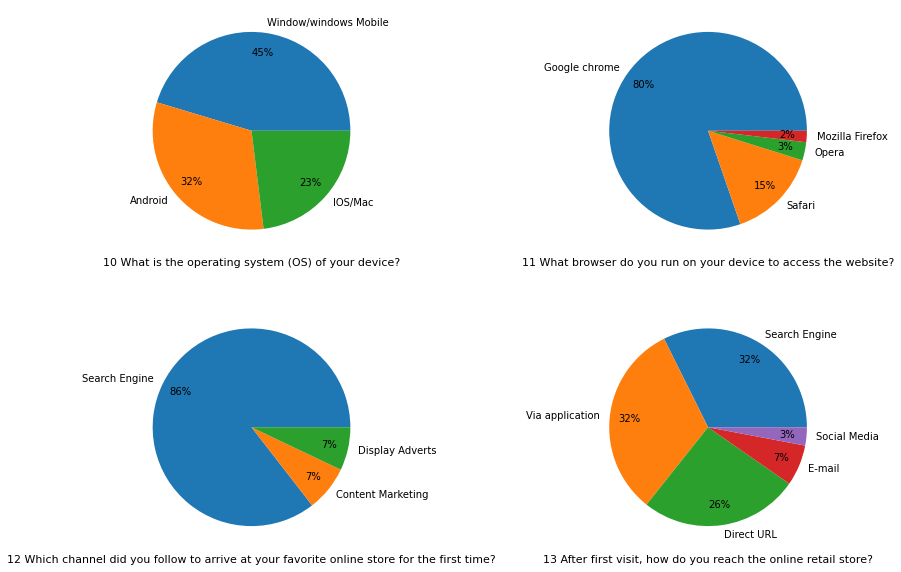

In [15]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[9:13]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=11)
    
# Observations:
# 1. Majority of the respondents use windows operating system.
# 2. Google Chrome is the most preferred browser(80%)
# 3. Use of search engine is highest(86%) to arrive at the e-commerce site for the first time.

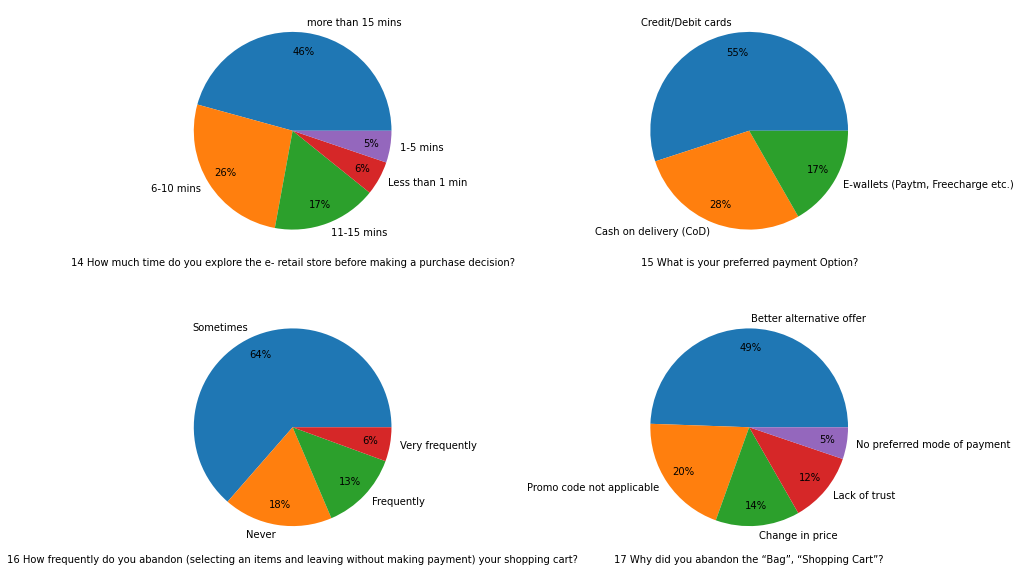

In [16]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[13:17]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. Almost 9 out of 10 people explore the e-commerce site for atleast 6 minutes before making a purchase.
# 2. More than 50% people prefer credit/debit cards for payment.
# 4. Almost half the respondents think that they get better alternative offer and hence abandon the shopping cart.

In [ ]:
# Now let's analyse customer's viewpoint on various parameters of e-commerce using pie-plots.

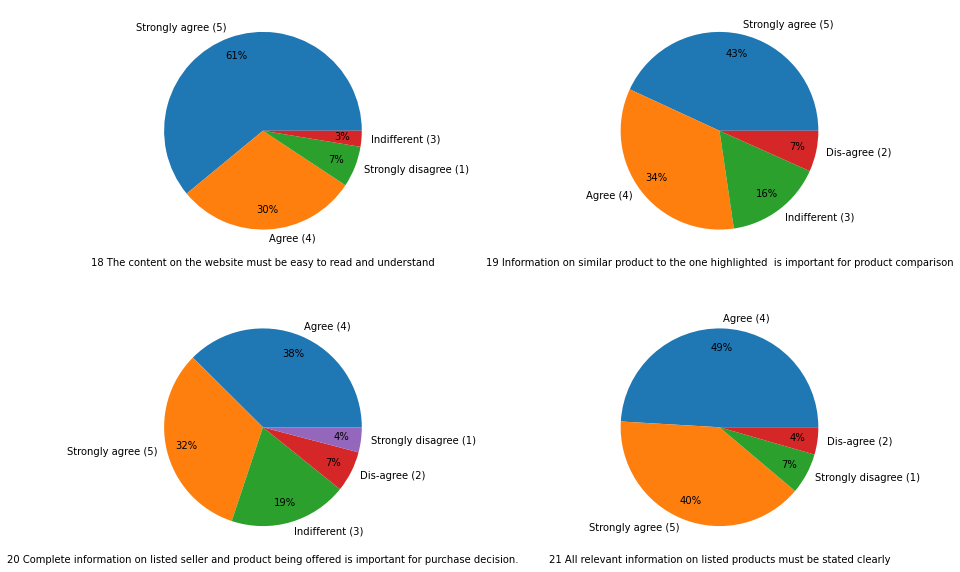

In [17]:
                                ############ INFORMATION QUALITY ##############

plt.figure(figsize=(15,10))
for i in enumerate(df.columns[17:21]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. More than 90% of the respondents agree that the content on the site must be easy to read and understand.
# 2. More than 75% agree that similar product comparision is important.
# 3. 70% of the respondents think that it is important to mention seller's information.
# 4. Almost 90% of the respondents thinks that product's relevant information should be stated clearly.

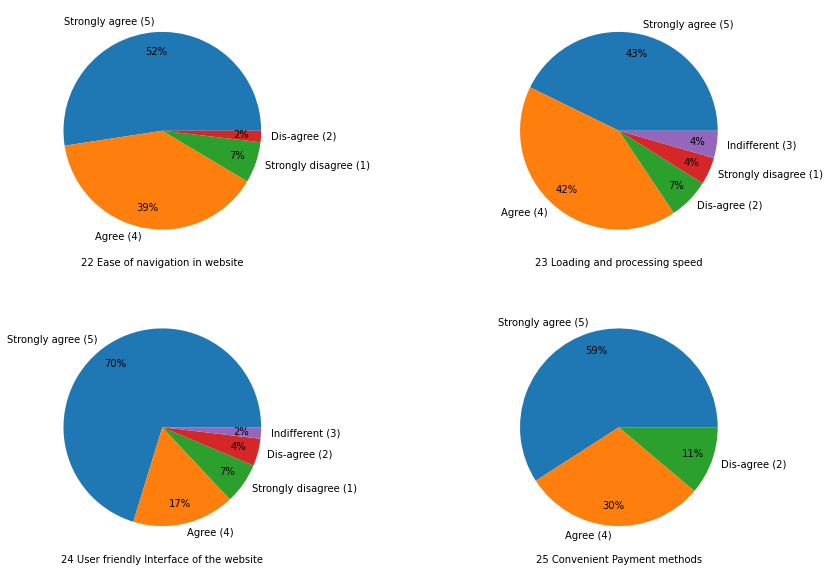

In [18]:
                                 ############ SYSTEM QUALITY ##############

plt.figure(figsize=(15,10))
for i in enumerate(df.columns[21:25]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. Ease of website navigation is important according to more than 90% of the respondents.
# 2. 85% of the respondents think that loading and processing speed is important. 
# 3. More than 85% agree that the user friendliness of the website is important.
# 4. Almost 90% of the people think that convenient payment methods is important.

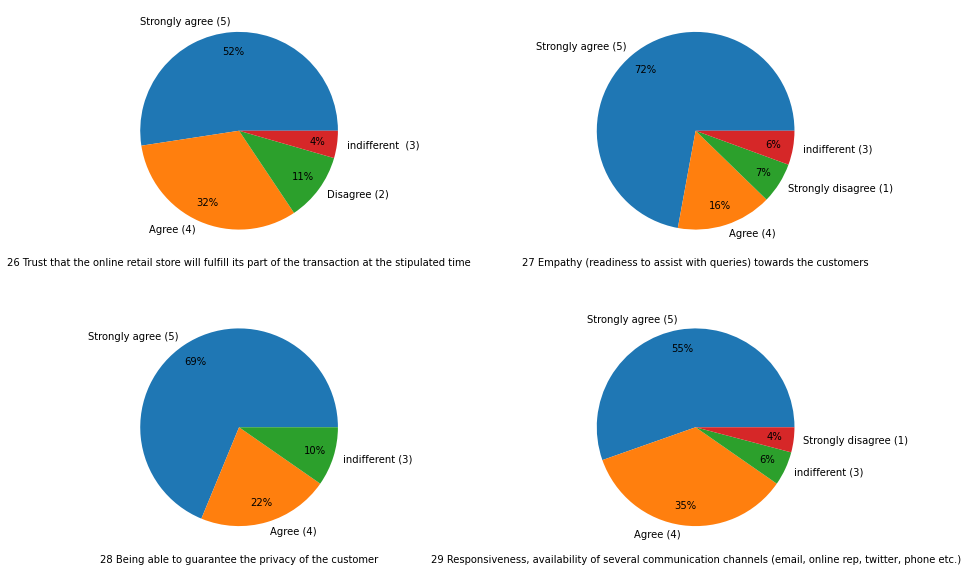

In [19]:
                                    ############ TRUST & RESPONSE ##############

plt.figure(figsize=(15,10))
for i in enumerate(df.columns[25:29]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. Almost 90% of the respondents believe that responsiveness with query and availability of multiple channels to communicate is important.
# 2. More than 90% of the respondents believe that privacy policy is an important factor.

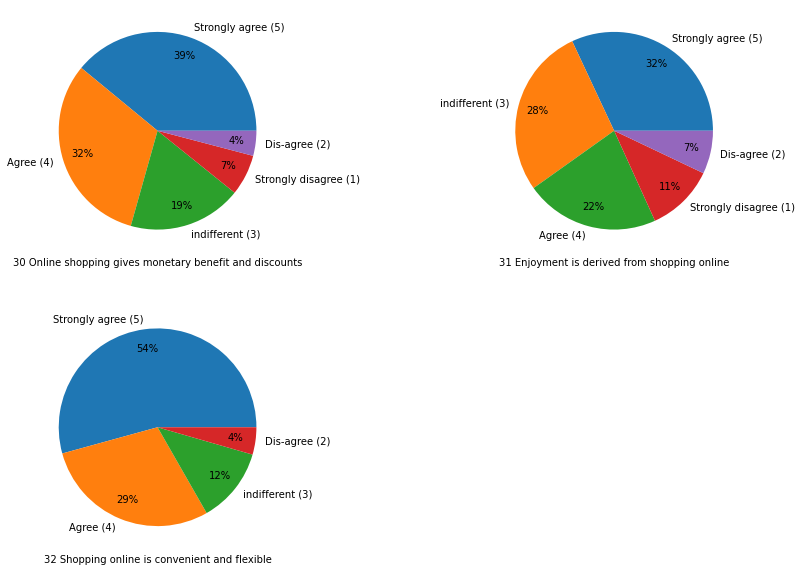

In [20]:
                                ############ NET BENEFIT AND ENJOYMENT ##############
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[29:32]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. More than 70% of the respondents believe that online shopping gives monetary benefits and discounts.
# 2. More than half the people consider online shopping enjoyable.
# 3. More than 80% of the people think that online shopping is convenient and flexible.

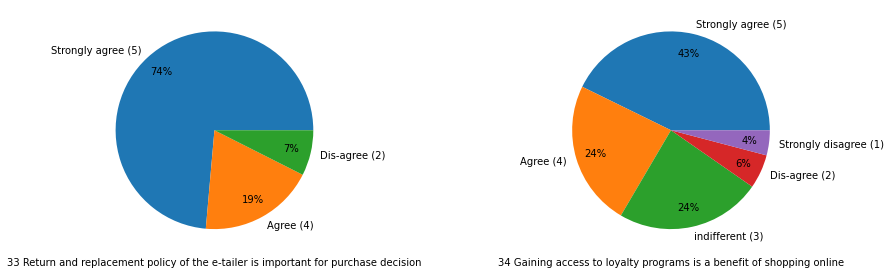

In [22]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[32:34]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. More than 90% of the respondents believe that return or replacement policy is important in purchase decisions.
# 2. Two-third of the respondents believe that loyalty programs is one of the benefits of online shopping online.

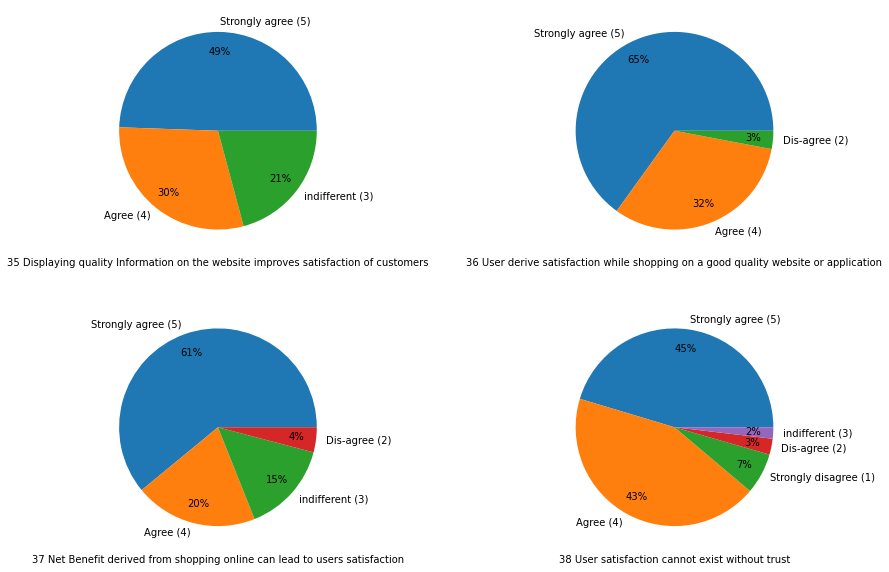

In [23]:
                        ################## USER SATISFACTION ######################

plt.figure(figsize=(15,10))
for i in enumerate(df.columns[34:38]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. Almost 80% of the respondents believe that quality information is important for customer satisfaction.
# 2. More than 90% people believe that quality of website/application is important for customer satisfaction.
# 3. More than 80% respondents believe that net benefit is important for customer satisfaction.
# 4. A very high majority(88%) of people think that without trust a customer satisfaction can't exist.

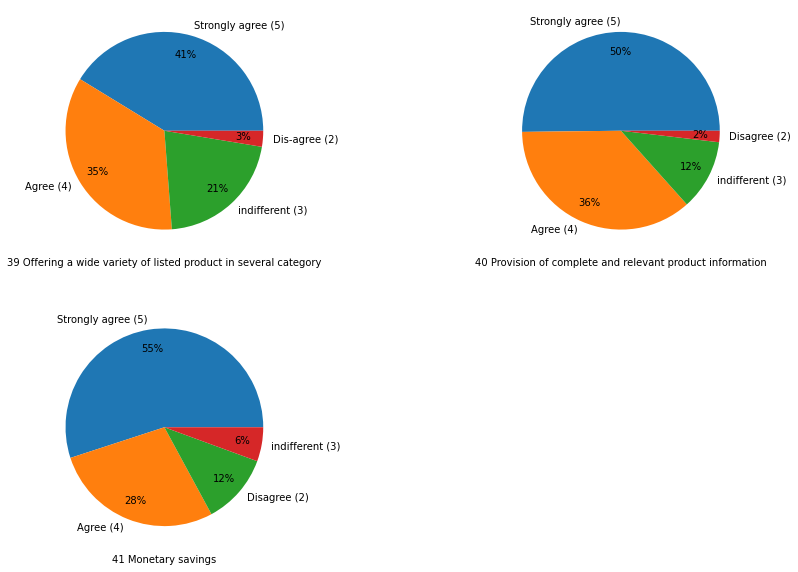

In [24]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[38:41]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. More than 75% of the respondents beleive that online shopping offers a wide variety of products in several category.
# 2. More than 80% of the respondents believe that online shopping help in monetary savings.

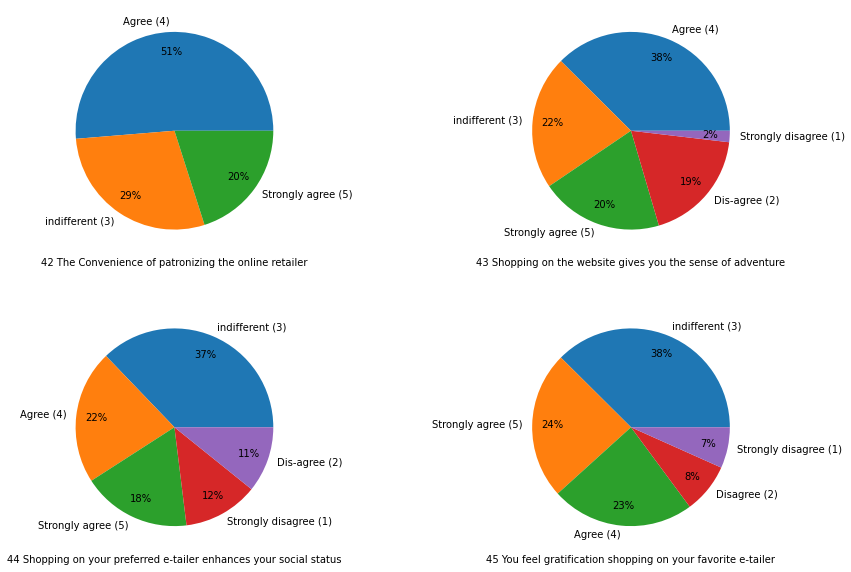

In [25]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[41:45]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. More than 70% of the respondents believe that patronizing online retailers is convenient.
# 2. More than half the respondents consider that online shopping gives them a sense of adventure.
# 3. 40% of the respondents believe that purchases from their preferred e-retailer enhances their social status.
# 4. 47% of the respondents feel gratification by shopping from their favourite e-commerce website.

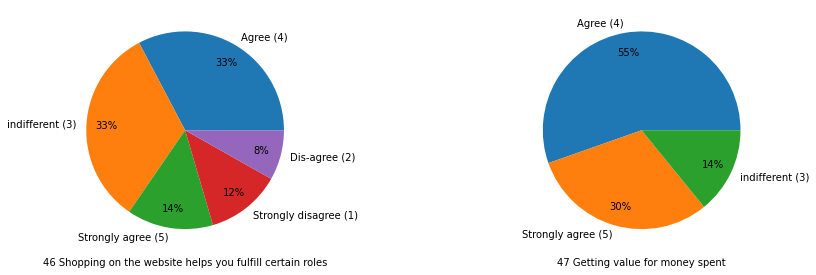

In [26]:
plt.figure(figsize=(15,10))
for i in enumerate(df.columns[45:47]):
    plt.subplot(2,2,i[0]+1)
    plt.pie(df[i[1]].value_counts(),labels=df[i[1]].value_counts().index,autopct='%1.0f%%',pctdistance=0.8)
    plt.xlabel(i[1],fontsize=10)
    
# Observations:
# 1. 47% of the respondents believe that online shopping helps them fulfill certain roles.
# 2. A high majority(85%) believes that online shopping helps them get value for their money.

In [ ]:
# Now let's look at the columns from number 48 to 71. 
# Here the respondents can choose one or more choice among 'amazon','flipkart','paytm','myntra' and 'snapdeal'.

In [9]:
# Let's see how the data looks in these columns.
df_tick_multiple= df.iloc[:,47:]
df_tick_multiple

# It is difficult to visualize data in this format.
# We have to do some tweaks with this data to be able to get some meaningful plots.

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com",...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.com,Amazon.in,Amazon.in,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,"Amazon.in, Flipkart.com",Flipkart.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,"Amazon.in, Flipkart.com, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.com,"Amazon.in, Flipkart.com",Amazon.in,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.co

In [10]:
counts_df= pd.DataFrame(index=['amazon','flipkart','paytm','myntra','snapdeal'])

for j in df_tick_multiple.columns:
    amazon=0
    flipkart=0
    paytm=0
    myntra=0
    snapdeal=0
    for i in df_tick_multiple[j]:
        if i.find("Amazon")!=(-1):
            amazon+=1
        else:
            pass

        if i.find("Flipkart.com")!=(-1):
            flipkart+=1
        else:
            pass

        if i.find("Paytm.com")!=(-1):
            paytm+=1
        else:
            pass

        if i.find("Myntra.com")!=(-1):
            myntra+=1
        else:
            pass

        if i.find("Snapdeal.com")!=(-1):
            snapdeal+=1
        else:
            pass

    counts= [amazon,flipkart,paytm,myntra,snapdeal]
    counts_df[j]=counts

counts_df

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
amazon,269,249,227,220,238,249,227,215,215,240,...,135,126,56,68,104,37,141,78,182,219
flipkart,221,201,175,184,194,162,146,158,203,162,...,103,94,43,61,60,44,72,62,117,127
paytm,150,125,67,20,59,99,96,107,0,0,...,77,28,72,94,53,98,63,39,58,44
myntra,146,147,115,64,64,74,64,79,132,29,...,35,74,75,68,7,26,37,66,14,76
snapdeal,182,130,61,14,59,81,45,0,90,50,...,67,92,0,63,109,90,8,74,25,0


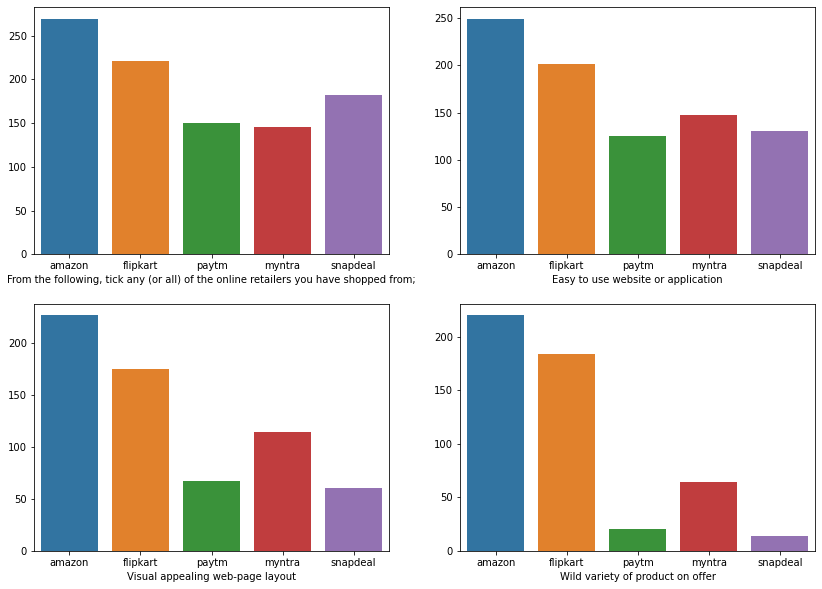

In [13]:
plt.figure(figsize=(14,10))
plot_num=1
for i in counts_df.columns[0:4]:
    plt.subplot(2,2,plot_num)
    sns.barplot(x=counts_df.index,y=i, data=counts_df)
    plt.xlabel(i)
    plt.ylabel("")
    plot_num+=1
    
# Observations:
# 1. All the respondents have made purchases from amazon.in. 
# 2. Out of 269 more than 200 respondents have shopped from flipkart. The numbers for snapdeal, paytm and myntra are below 200.
# 3. Amazon performs best in terms of ease to use, visual appeal and product variety folowed by flipkart.

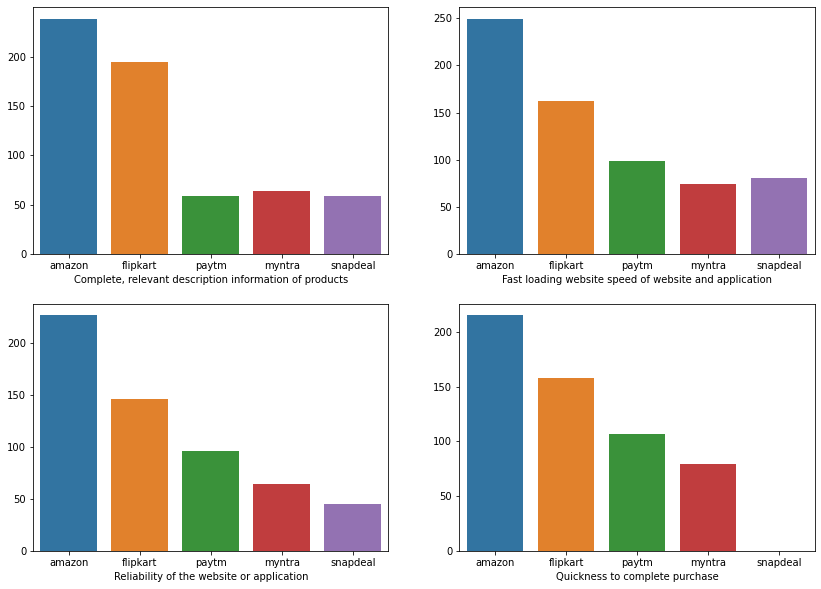

In [189]:
plt.figure(figsize=(14,10))
plot_num=1
for i in counts_df.columns[4:8]:
    plt.subplot(2,2,plot_num)
    sns.barplot(x=counts_df.index,y=i, data=counts_df)
    plt.xlabel(i)
    plt.ylabel("")
    plot_num+=1
    
# Observations:
# 1. Amazon performs best in terms of relevant product information, website loading speed, reliability, and quickness to 
#    complete purchase.
# 2. Flipkart seems to be the second choice for these above parameters.
# 3. The response for paytm, myntra and snapdeal seems to be quite low as compared to amazon.
# 4. snapdeal has zero repondents in quickness to complete purchase criteria.

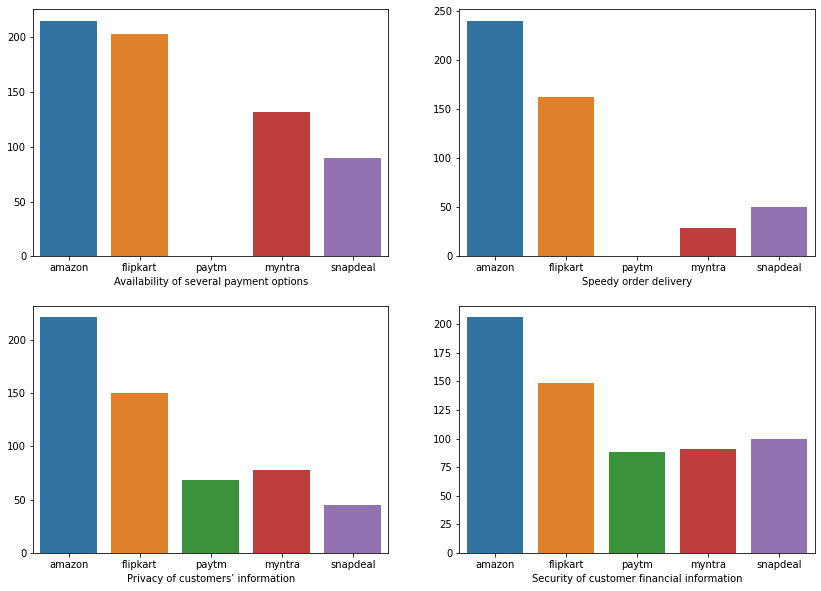

In [190]:
plt.figure(figsize=(14,10))
plot_num=1
for i in counts_df.columns[8:12]:
    plt.subplot(2,2,plot_num)
    sns.barplot(x=counts_df.index,y=i, data=counts_df)
    plt.xlabel(i)
    plt.ylabel("")
    plot_num+=1

# Observations:
# 1. Amazon performs best in terms of payment options, speedy delivery,privacy of customer's info and security of financial info.
# 2. Flipkart seems to be the second choice for these above parameters.
# 3. Paytm performs poorly in payments options and speedy delivery criteria.
# 4. The response for paytm, myntra and snapdeal seems to be quite low as compared to amazon.

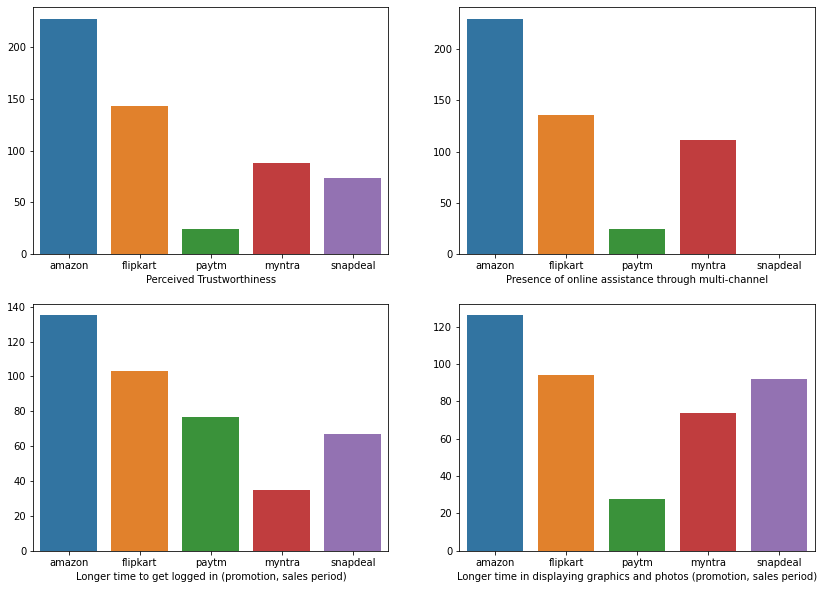

In [191]:
plt.figure(figsize=(14,10))
plot_num=1
for i in counts_df.columns[12:16]:
    plt.subplot(2,2,plot_num)
    sns.barplot(x=counts_df.index,y=i, data=counts_df)
    plt.xlabel(i)
    plt.ylabel("")
    plot_num+=1
    
# Observations:
# 1. Amazon performs best in terms of trustworthiness and online assistance. Flipkart seems to be the second choice.
# 2. Paytm performs poorly in trustworthiness and also online assistance.
# 3. Snapdeal performs poorly in online assistance criteria.
# 4. During promotion or sales period, it takes longer time in amazon to login and display graphics/photos.

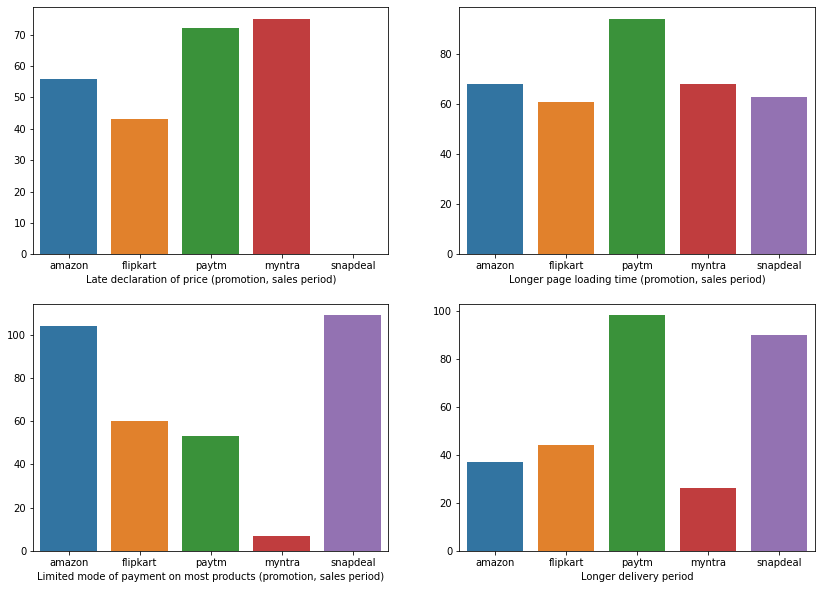

In [192]:
plt.figure(figsize=(14,10))
plot_num=1
for i in counts_df.columns[16:20]:
    plt.subplot(2,2,plot_num)
    sns.barplot(x=counts_df.index,y=i, data=counts_df)
    plt.xlabel(i)
    plt.ylabel("")
    plot_num+=1
    
# Observations:
# 1. During promotion or sales period, myntra and paytm declares price lately.
# 2. During promotion or sales period, paytm takes longer time in page loading. We have a fairly mixed response in this criteria.
# 3. During promotion or sales period, snapdeal and amazon have limited mode of payments for most products. Myntra performs well in this.
# 4. Paytm and snapdeal have longer delivery period.

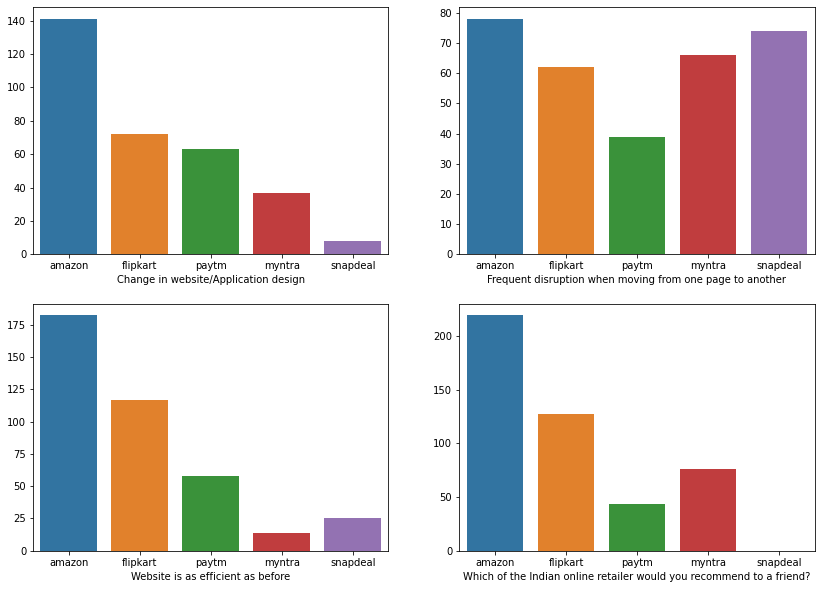

In [60]:
plt.figure(figsize=(14,10))
plot_num=1
for i in counts_df.columns[20:24]:
    plt.subplot(2,2,plot_num)
    sns.barplot(x=counts_df.index,y=i, data=counts_df)
    plt.xlabel(i)
    plt.ylabel("")
    plot_num+=1
    
# Observations:
# 1. Majority of respondents believe that a change in website/application design is needed in amazon.
# 2. There are frequent disruptions when moving from one page to another in all of them. Paytm perfoms best in this criteria.
# 3. Majority of respondents believe that amazon website is as efficient as before.
# 4. Amazon is most likely to be recommended to others by our respondents followed by flipkart, myntra and paytm.
# 5. None of the respondents is likely to recommend snapdeal to any of their friends.

In [35]:
# defining a function for columns 48-71 to make separate columns for each of the 5 e-commerce sites which captures the data of 
# whether a e-commerce site is chosen by the respondent or not. 1 denotes chosen and 0 denotes not chosen.
# The function takes a column name as input and returns a dataframe with encoded values for that column.

def encode_it(column):
    amazon=[]
    flipkart=[]
    paytm=[]
    myntra=[]
    snapdeal=[]
    for i in df_tick_multiple[column]:
        if i.find("Amazon")!=(-1):
            amazon.append(1)
        else:
            amazon.append(0)

        if i.find("Flipkart.com")!=(-1):
            flipkart.append(1)
        else:
            flipkart.append(0)

        if i.find("Paytm.com")!=(-1):
            paytm.append(1)
        else:
            paytm.append(0)

        if i.find("Myntra.com")!=(-1):
            myntra.append(1)
        else:
            myntra.append(0)

        if i.find("Snapdeal.com")!=(-1):
            snapdeal.append(1)
        else:
            snapdeal.append(0)

    results_df= pd.DataFrame({'amazon':amazon,
                              'flipkart':flipkart,
                              'paytm':paytm,
                              'myntra':myntra,
                              'snapdeal':snapdeal})
    return results_df

In [146]:
df['From the following, tick any (or all) of the online retailers you have shopped from;']

0                                   Amazon.in, Paytm.com
1      Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com
2                       Amazon.in, Paytm.com, Myntra.com
3      Amazon.in, Flipkart.com, Paytm.com, Myntra.com...
4      Amazon.in, Flipkart.com, Paytm.com, Myntra.com...
                             ...                        
264                                            Amazon.in
265                              Amazon.in, Flipkart.com
266                Amazon.in, Flipkart.com, Snapdeal.com
267    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com
268                                            Amazon.in
Name: From the following, tick any (or all) of the online retailers you have shopped from;, Length: 269, dtype: object

In [145]:
df_encoded= encode_it("From the following, tick any (or all) of the online retailers you have shopped from;")
df_encoded

,amazon,flipkart,paytm,myntra,snapdeal
0,1,0,1,0,0
1,1,1,0,1,1
2,1,0,1,1,0
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
264,1,0,0,0,0
265,1,1,0,0,0
266,1,1,0,0,1
267,1,1,0,1,1


# Till now we analyzed the data distribution in various columns. Now let us see some plots which shows the relation among various columns.

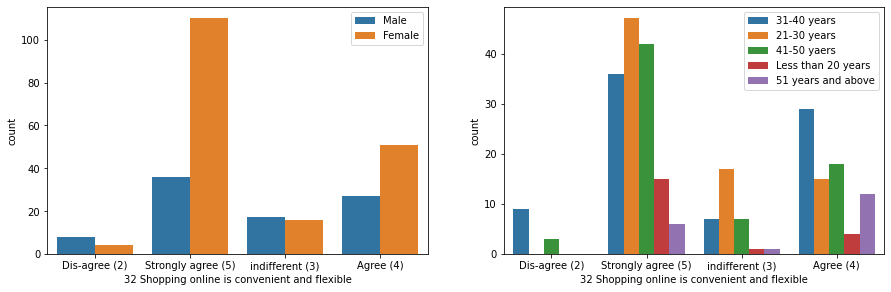

In [114]:
# We saw the pie-plot for the overall response on 'Shopping online is convenient and flexible' statement.
# 224 people out of 269 agree or strongly-agree that shopping online is convenient and flexible.
# Let's see the plots with respect to gender and age.
df_cus_info= df[['1Gender of respondent','2 How old are you?']]
plt.figure(figsize=(15,10))
count=1
for i in df_cus_info.columns:
    plt.subplot(2,2,count)
    sns.countplot(x=df['32 Shopping online is convenient and flexible'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that shopping online is convenient and flexible, majority are female.

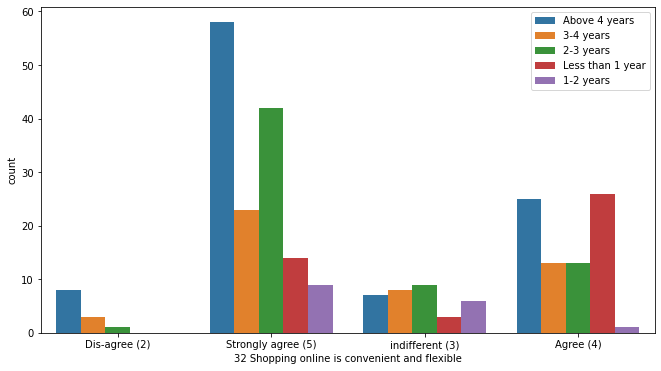

In [150]:
# plot with respect to how long a person has been shopping online.
plt.figure(figsize=(11,6))
sns.countplot(x=df['32 Shopping online is convenient and flexible'],hue= df['5 Since How Long You are Shopping Online ?'])
plt.legend(loc='upper right')
   
# Observations: 
# 1. Out of the people who strongly-agree that shopping online is convenient and flexible, majority have been shopping online for 
#    more than 4 years.

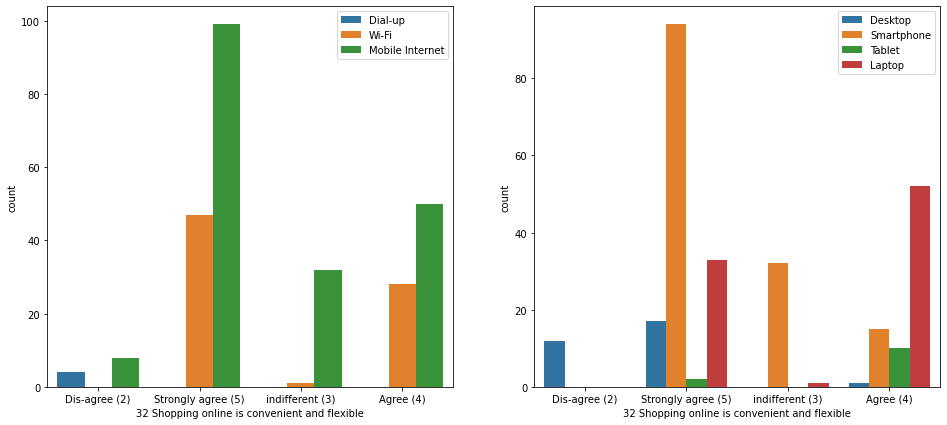

In [151]:
# plots with respect to internet connection type and device used.
df_cus_info= df[['7 How do you access the internet while shopping on-line?',
                 '8 Which device do you use to access the online shopping?']]
plt.figure(figsize=(16,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,2,count)
    sns.countplot(x=df['32 Shopping online is convenient and flexible'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1

# Observations: 
# 1. Out of the people who strongly-agree or agree that shopping online is convenient and flexible, majority are mobile internet users 
#    followed by wifi users. They mainly use smartphone followed by laptop.

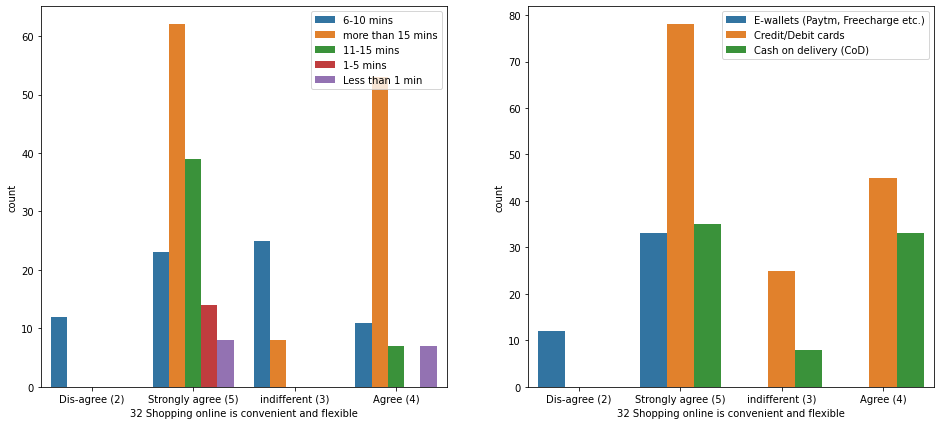

In [117]:
# plots with respect to time taken to explore before purchase and preferred payment options.
df_cus_info= df[['14 How much time do you explore the e- retail store before making a purchase decision?',
                 '15 What is your preferred payment Option?']]
plt.figure(figsize=(16,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,2,count)
    sns.countplot(x=df['32 Shopping online is convenient and flexible'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations:
# 1. Out of the people who strongly-agree or agree that shopping online is convenient and flexible, a high majority of people
#    spend atleast 11 minutes before purchasing. They mainly prefer credit/debit cards for payment option followed by cash on delivery.

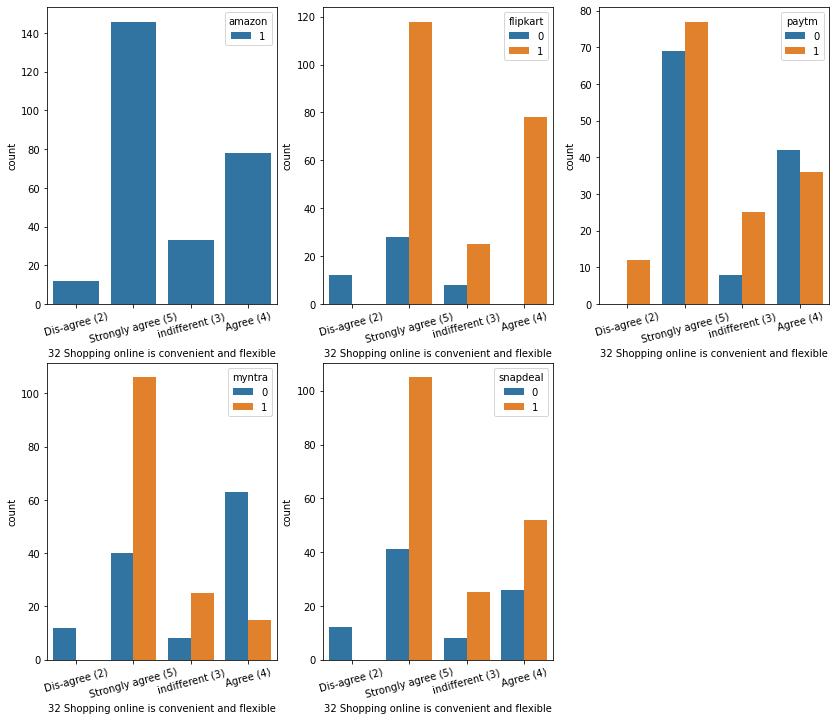

In [95]:
# plots with respect to which of the Indian online retailers they have shopped from.

df_encoded=encode_it('From the following, tick any (or all) of the online retailers you have shopped from;')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['32 Shopping online is convenient and flexible'],hue= df_encoded[i])
    plt.xticks(rotation=15)
    count+=1
    
# Observations:
# 1. All the respondents have shopping experience from amazon.
# 2. Out of the 224 people, a very high majority(around 200) have shopping experience from flipkart.(224 people agree or strongly agree that shopping
#    online is beneficial)
# 3. Out of the 224 people,around half the people have shopping experience from paytm.
# 4. Out of the 224 people, around 130 people have shopping experience with myntra and around 150 with snapdeal.

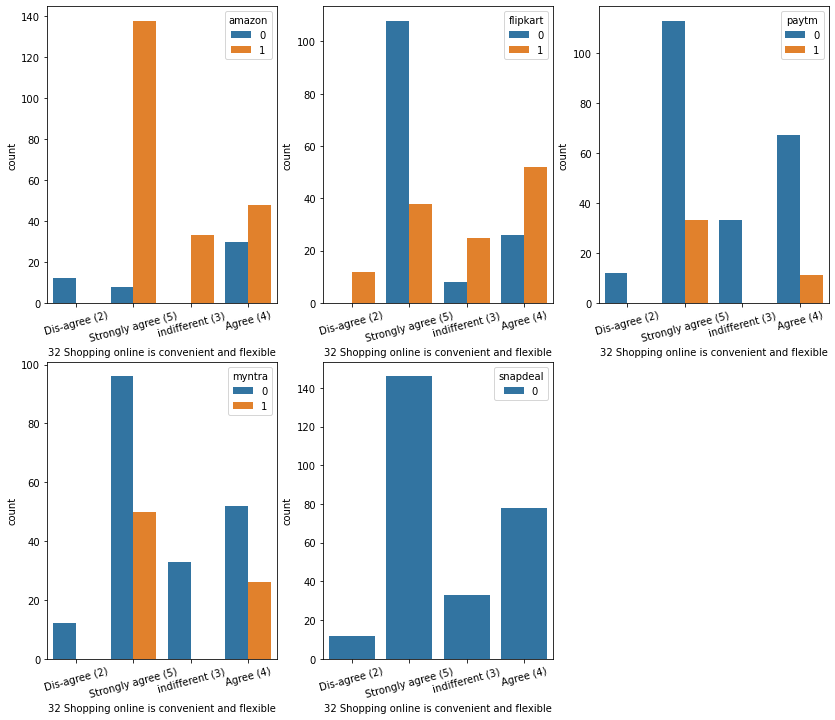

In [96]:
# plots with respect to which of the Indian online retailers they are likely to recommend a friend.

df_encoded=encode_it('Which of the Indian online retailer would you recommend to a friend?')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['32 Shopping online is convenient and flexible'],hue= df_encoded[i])
    plt.xticks(rotation=15)
    count+=1
    
# Observations:
# 1. Out of the 224 people who strongly-agree or agree that shopping online is convenient and flexible, around 180 people recommends amazon
#    to a friend.
# 2. In case of flipkart, out of those 224 people, around 100 recommend it to friends.
# 3. In case of myntra, out of those 224 people, around 80 recommend it to friends.
# 4. In case of paytm, less than 50.
# 5. It seems that no one is likely to recommend snapdeal to their friends.

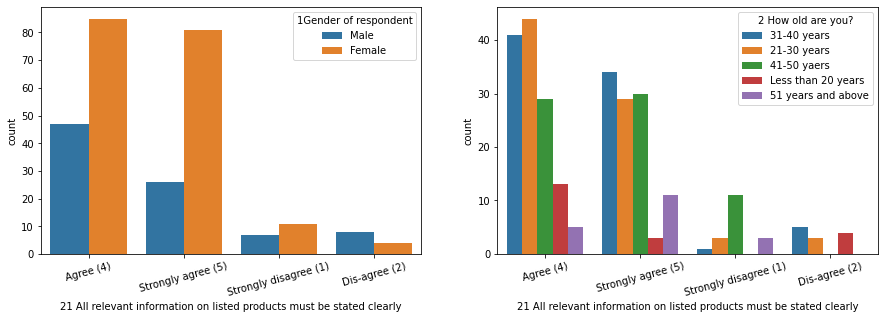

In [98]:
# We saw the pie-plot for the overall response on 'All relevant information on listed products must be stated clearly' statement.
# 239 people out of 269 agree or strongly-agree that shopping online is convenient and flexible.
# Let's see the plots with respect to gender and age.
df_cus_info= df[['1Gender of respondent','2 How old are you?']]
plt.figure(figsize=(15,10))
count=1
for i in df_cus_info.columns:
    plt.subplot(2,2,count)
    sns.countplot(x=df['21 All relevant information on listed products must be stated clearly'],hue= df[i])
    plt.xticks(rotation=15)
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that all relevant information on listed products must be stated clearly, majority 
#    are women.

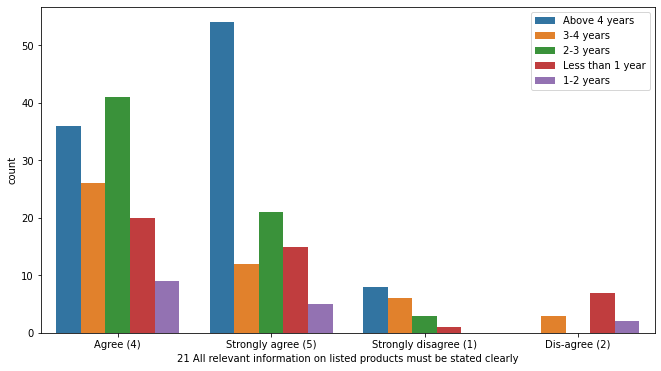

In [29]:
# plot with respect to how long a person has been shopping online.
plt.figure(figsize=(11,6))
sns.countplot(x=df['21 All relevant information on listed products must be stated clearly'],
              hue= df['5 Since How Long You are Shopping Online ?'])
plt.legend(loc='upper right')

# Observations: 
# 1. Out of the people who strongly-agree that all relevant information on listed products must be stated clearly, majority have
#    been shopping online for more than 4 years.

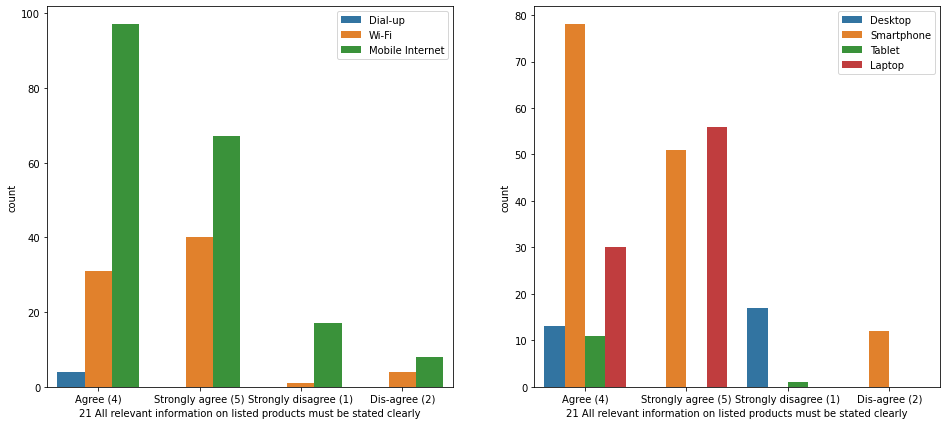

In [105]:
# plots with respect to internet connection type and device used.
df_cus_info= df[['7 How do you access the internet while shopping on-line?',
                 '8 Which device do you use to access the online shopping?']]
plt.figure(figsize=(16,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,2,count)
    sns.countplot(x=df['21 All relevant information on listed products must be stated clearly'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that all relevant information on listed products must be stated clearly, majority are 
#    mobile internet users followed by wifi users. They mainly use smartphone and laptop.

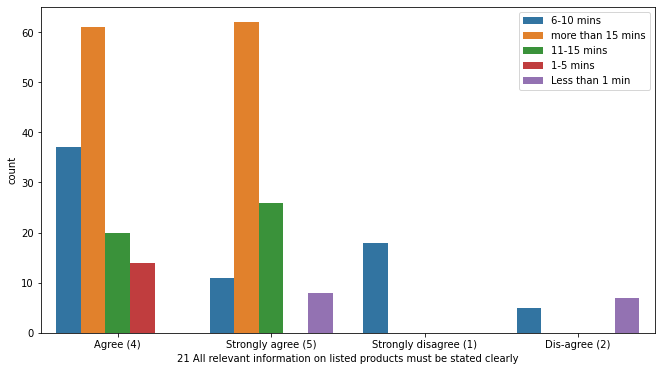

In [31]:
# plot with respect to time taken to explore before purchase.
df_cus_info= df[['14 How much time do you explore the e- retail store before making a purchase decision?']]
plt.figure(figsize=(11,6))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,1,count)
    sns.countplot(x=df['21 All relevant information on listed products must be stated clearly'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations:
# 1. Out of the people who strongly-agree or agree that all relevant information on listed products must be stated clearly, majority
#    of people spend more than 15 minutes before making a purchase.

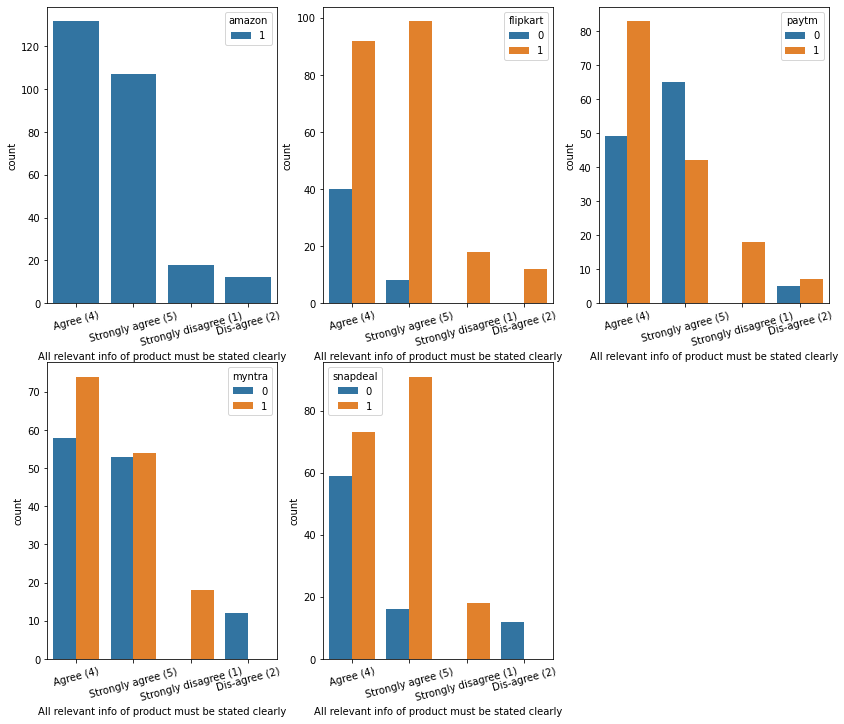

In [119]:
# plots with respect to which of the Indian online retailers they have shopped from.
df_encoded=encode_it('From the following, tick any (or all) of the online retailers you have shopped from;')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['21 All relevant information on listed products must be stated clearly'],hue= df_encoded[i])
    plt.xlabel("All relevant info of product must be stated clearly")
    plt.xticks(rotation=15)
    count+=1
    
# Observations:
# 1. All the respondents have shopping experience from amazon.
# 2. Out of the 239 people, a high majority(around 190) have shopping experience from flipkart.(239 people agree or strongly agree 
#    that all relevant info of product must be stated clearly)
# 3. Out of the 239 people,around half the people have shopping experience from paytm.
# 4. Out of the 239 people, around 130 people have shopping experience with myntra and around 160 with snapdeal.

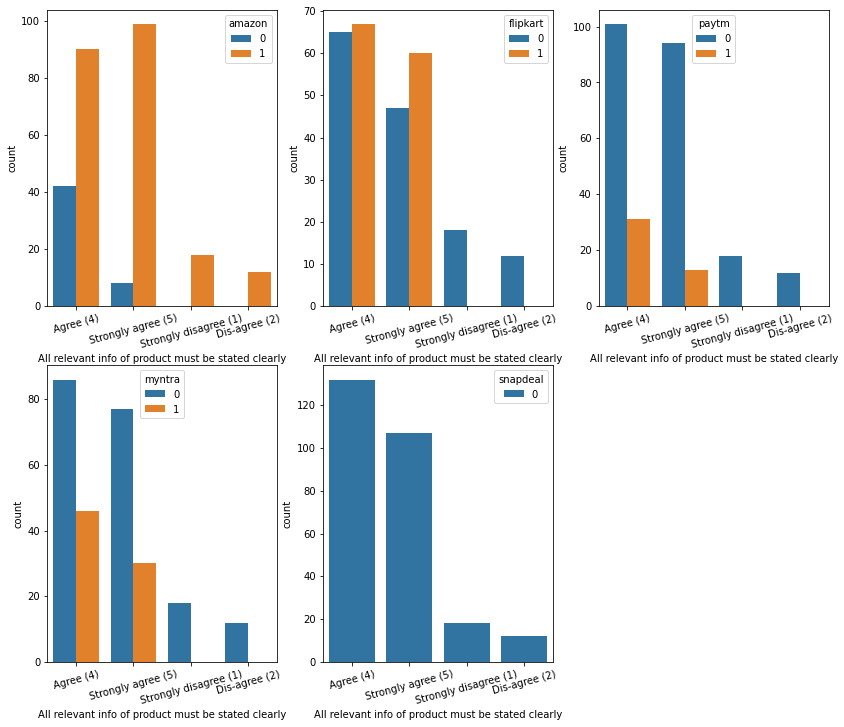

In [121]:
# plots with respect to which of the Indian online retailers they are likely to recommend a friend.
df_encoded=encode_it('Which of the Indian online retailer would you recommend to a friend?')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['21 All relevant information on listed products must be stated clearly'],hue= df_encoded[i])
    plt.xlabel("All relevant info of product must be stated clearly")
    plt.xticks(rotation=15)
    count+=1
    
# Observations:
# 1. Out of the 239 people who strongly-agree or agree that all relevant info of product must be stated clearly, around 190 people 
#    recommends amazon to a friend.
# 2. In case of flipkart, out of those 239 people, around 125 recommend it to friends.
# 3. In case of myntra, out of those 239 people, around 80 recommend it to friends.
# 4. In case of paytm, less than 50.
# 5. It seems that no one is likely to recommend snapdeal to their friends.

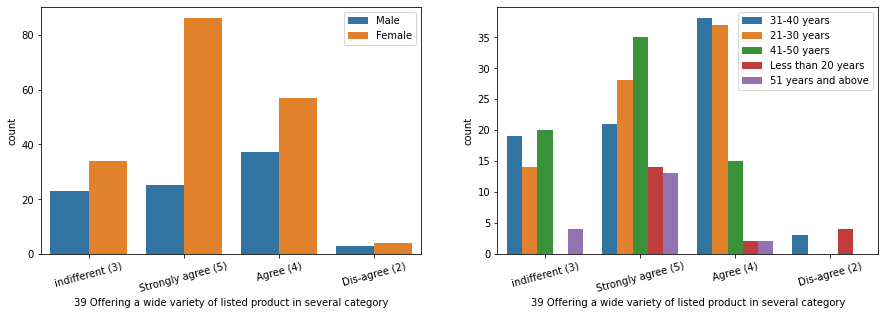

In [123]:
# We saw the pie-plot for the overall response on 'Offering a wide variety of listed product in several category' statement.
# 205 people out of 269 agree or strongly-agree that e-retailer should offer a wide variety of listed product in several category.
# Let's see the plots with respect to gender and age.
df_cus_info= df[['1Gender of respondent','2 How old are you?']]
plt.figure(figsize=(15,10))
count=1
for i in df_cus_info.columns:
    plt.subplot(2,2,count)
    sns.countplot(x=df['39 Offering a wide variety of listed product in several category'],hue= df[i])
    plt.legend(loc='upper right')
    plt.xticks(rotation=15)
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that e-retailer should offer a wide variety of listed product in several category, 
#    majority are female.

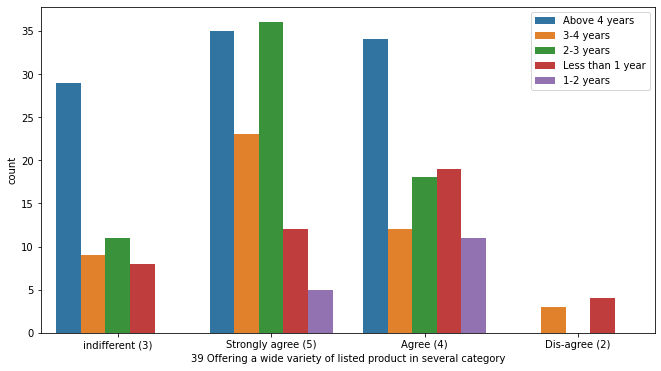

In [33]:
# plot with respect to how long a person has been shopping online.
plt.figure(figsize=(11,6))
sns.countplot(x=df['39 Offering a wide variety of listed product in several category'],hue= df['5 Since How Long You are Shopping Online ?'])
plt.legend(loc='upper right')

# Observations: 
# 1. Out of the people who strongly-agree or agree that e-retailer should offer a wide variety of listed product in several category, 
#    a high majority have been shopping online for atleast 2 years.

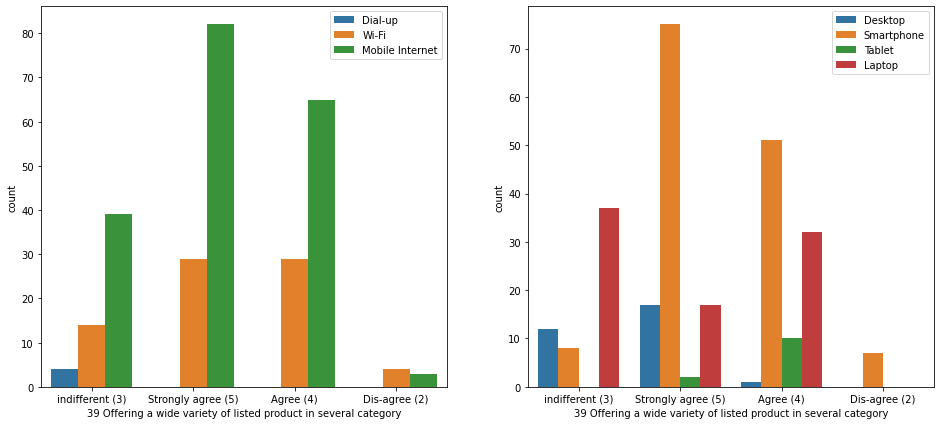

In [125]:
# plots with respect to internet connection type and device used.
df_cus_info= df[['7 How do you access the internet while shopping on-line?',
                 '8 Which device do you use to access the online shopping?']]
plt.figure(figsize=(16,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,2,count)
    sns.countplot(x=df['39 Offering a wide variety of listed product in several category'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that e-retailer should offer a wide variety of listed product in several category,
#    majority are mobile internet users followed by wifi users. They mainly use smartphone and laptop.

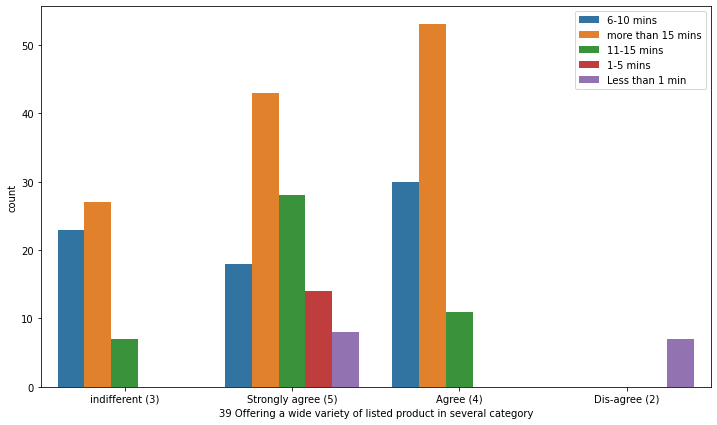

In [126]:
# plot with respect to time taken to explore before purchase.
df_cus_info= df[['14 How much time do you explore the e- retail store before making a purchase decision?']]
plt.figure(figsize=(12,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,1,count)
    sns.countplot(x=df['39 Offering a wide variety of listed product in several category'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations:
# 1. Out of the people who strongly-agree or agree that e-retailer should offer a wide variety of listed product in several category,
#    majority of people spend more than 15 minutes before making a purchase.

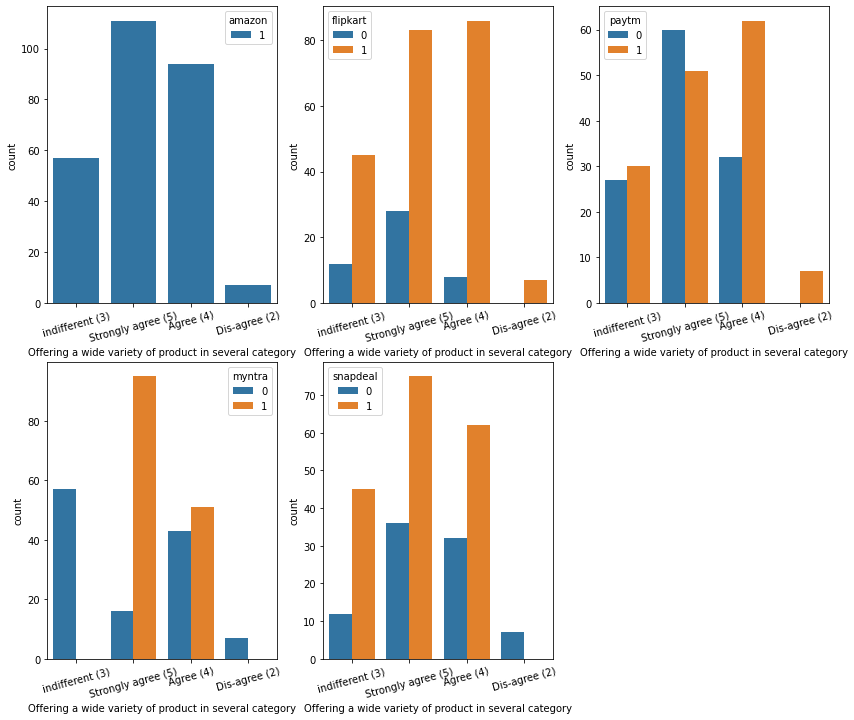

In [129]:
# plots with respect to which of the Indian online retailers they have shopped from.
df_encoded=encode_it('From the following, tick any (or all) of the online retailers you have shopped from;')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['39 Offering a wide variety of listed product in several category'],hue= df_encoded[i])
    plt.xlabel("Offering a wide variety of product in several category")
    plt.xticks(rotation=15)
    count+=1
    
# Observations:
# 1. All the respondents have shopping experience from amazon.
# 2. Out of the 205 people, a high majority(around 170) have shopping experience from flipkart.(205 people agree or strongly agree 
#    that e-retailer should offer a wide variety of listed product in several category)
# 3. Out of the 205 people,around half the people have shopping experience from paytm.
# 4. Out of the 205 people, around 150 people have shopping experience with myntra and around 130 with snapdeal.

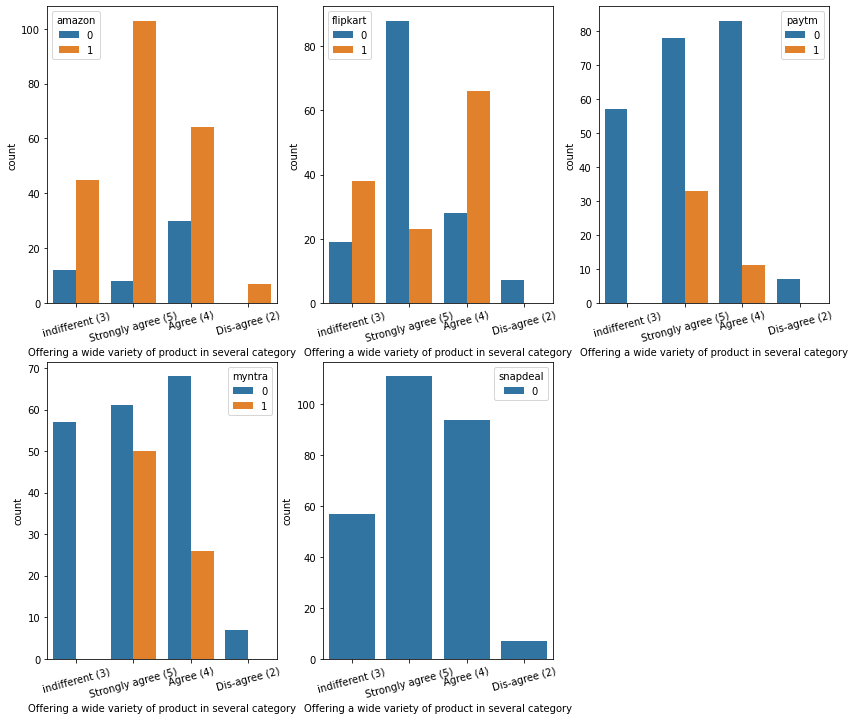

In [130]:
# plots with respect to which of the Indian online retailers they are likely to recommend a friend.
df_encoded=encode_it('Which of the Indian online retailer would you recommend to a friend?')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['39 Offering a wide variety of listed product in several category'],hue= df_encoded[i])
    plt.xlabel("Offering a wide variety of product in several category")
    plt.xticks(rotation=15)
    count+=1
    
# Observations:
# 1. Out of the 205 people who strongly-agree or agree that  e-retailer should offer a wide variety of listed product in several category, 
#    around 165 people recommends amazon to a friend. A majority of people with indifferent view also likely to recmmend amazon.
# 2. In case of flipkart, out of those 205 people, around 100 people recommend it to friends.
# 3. In case of myntra, out of those 205 people, around 75 recommend it to friends.
# 4. In case of paytm, less than 50.
# 5. It seems that no one is likely to recommend snapdeal to their friends.

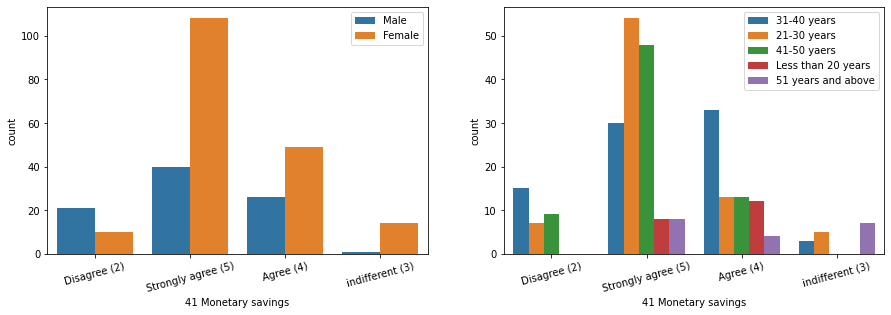

In [131]:
# We saw the pie-plot for the overall response on 'Monetary savings' statement.
# 223 people out of 269 agree or strongly-agree that online shopping leads to monetary savings.
# Let's see the plots with respect to gender and age.
df_cus_info= df[['1Gender of respondent','2 How old are you?']]
plt.figure(figsize=(15,10))
count=1
for i in df_cus_info.columns:
    plt.subplot(2,2,count)
    sns.countplot(x=df['41 Monetary savings'],hue= df[i])
    plt.legend(loc='upper right')
    plt.xticks(rotation=15)
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that online shopping leads to monetary savings, majority are female.

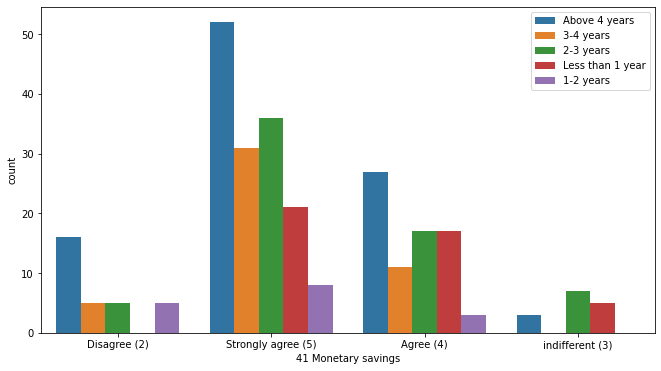

In [37]:
# plot with respect to how long a person has been shopping online.
plt.figure(figsize=(11,6))
sns.countplot(x=df['41 Monetary savings'],hue= df['5 Since How Long You are Shopping Online ?'])
plt.legend(loc='upper right')

# Observations: 
# 1. Out of the people who strongly-agree or agree that online shopping leads to monetary savings, a high majority have been shopping 
#    online for atleast 2 years.

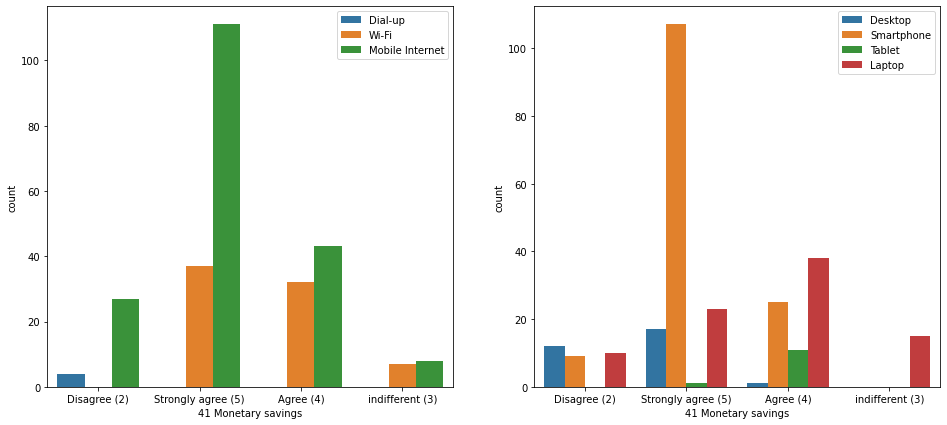

In [133]:
# plots with respect to internet connection type and device used.
df_cus_info= df[['7 How do you access the internet while shopping on-line?',
                 '8 Which device do you use to access the online shopping?']]
plt.figure(figsize=(16,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,2,count)
    sns.countplot(x=df['41 Monetary savings'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree online shopping leads to monetary savings, majority are mobile internet users
#    followed by wifi users. They mainly use smartphone and laptop.

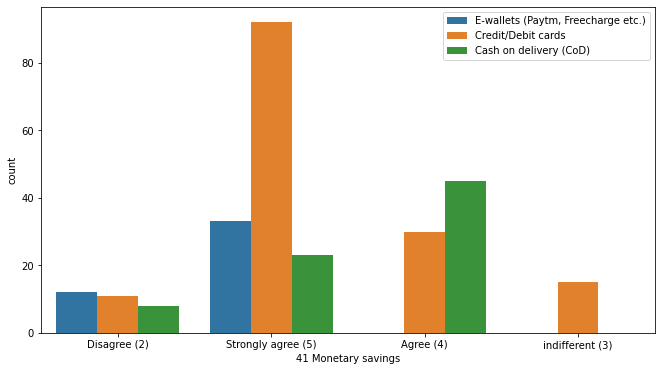

In [38]:
# plot with respect to preferred payment options.
plt.figure(figsize=(11,6))
sns.countplot(x=df['41 Monetary savings'],hue= df['15 What is your preferred payment Option?'])
plt.legend(loc='upper right')

# Observations: 
# 1. Out of the 223 people who strongly-agree or agree that online shopping leads to monetary savings, around 130 prefer credit/debit cards.
# 2. Around 70 prefer cash on delivery and less than 50 prefer e-wallets.

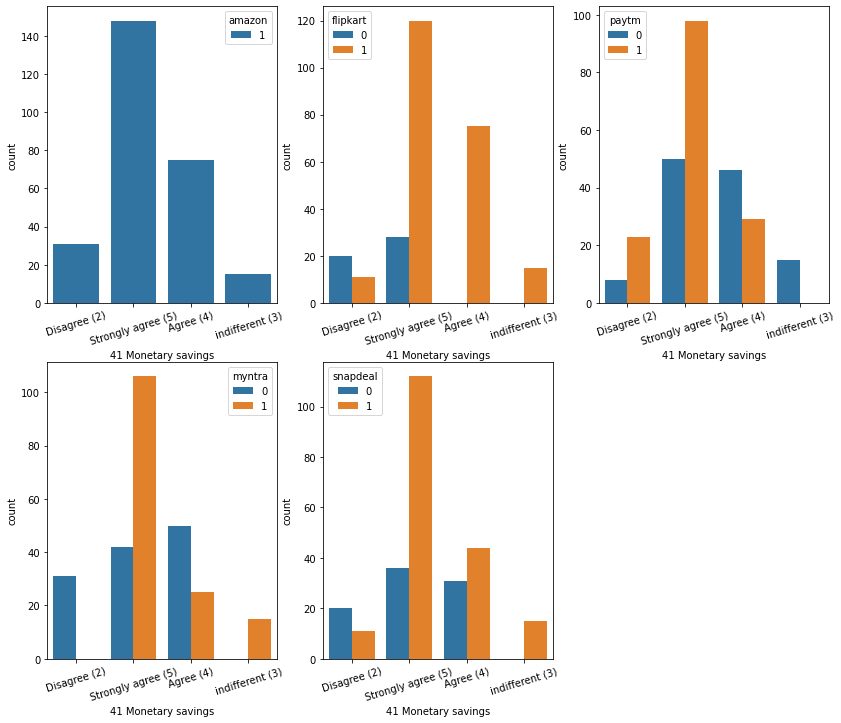

In [136]:
# plots with respect to which of the Indian online retailers they have shopped from.
df_encoded=encode_it('From the following, tick any (or all) of the online retailers you have shopped from;')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['41 Monetary savings'],hue= df_encoded[i])
    plt.xticks(rotation=17)
    count+=1
    
# Observations:
# 1. All the respondents have shopping experience from amazon.
# 2. Out of the 223 people, a high majority(around 190) have shopping experience from flipkart.(223 people agree or strongly agree 
#    that online shopping leads to monetary savings)
# 3. Out of the 223 people,around 130 people have shopping experience from paytm.
# 4. Out of the 223 people, around 130 people have shopping experience with myntra and around 150 with snapdeal.

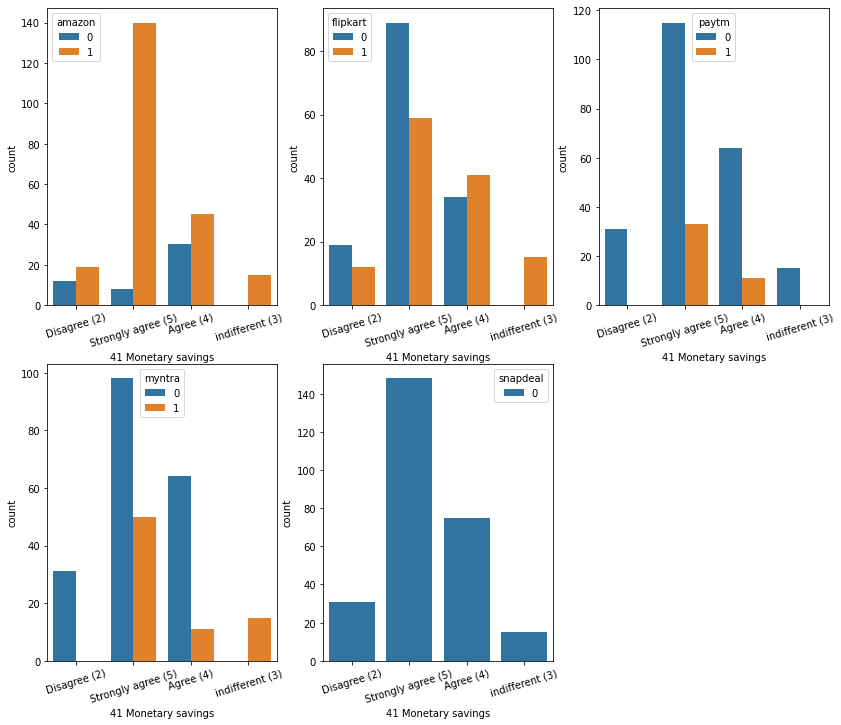

In [137]:
# plots with respect to which of the Indian online retailers they are likely to recommend a friend.
df_encoded=encode_it('Which of the Indian online retailer would you recommend to a friend?')
plt.figure(figsize=(14,12))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['41 Monetary savings'],hue= df_encoded[i])
    plt.xticks(rotation=17)
    count+=1
    
# Observations:
# 1. Out of the 223 people who strongly-agree or agree that online shopping leads to monetary savings, around 180 people 
#    recommends amazon to a friend.
# 2. In case of flipkart, out of those 223 people, around 100 people recommend it to friends.
# 3. In case of myntra, out of those 205 people, around 60 recommend it to friends.
# 4. In case of paytm, less than 50.
# 5. It seems that no one is likely to recommend snapdeal to their friends.

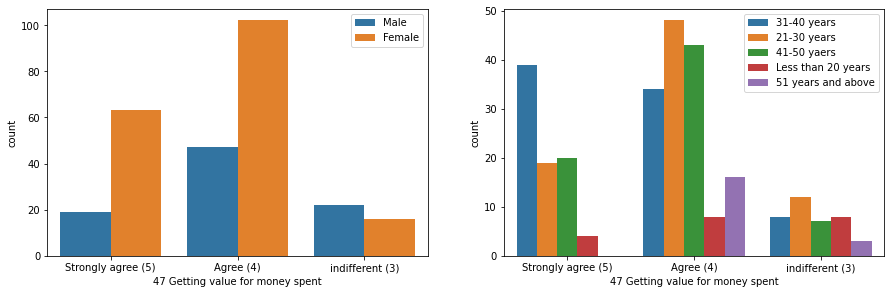

In [138]:
# We saw the pie-plot for the overall response on 'Getting value for money spent' statement.
# 231 people out of 269 agree or strongly-agree that online shopping helps them get value for money spent.
# Let's see the plots with respect to gender and age.
df_cus_info= df[['1Gender of respondent','2 How old are you?']]
plt.figure(figsize=(15,10))
count=1
for i in df_cus_info.columns:
    plt.subplot(2,2,count)
    sns.countplot(x=df['47 Getting value for money spent'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree that online shopping helps them get value for money spent, majority are female.

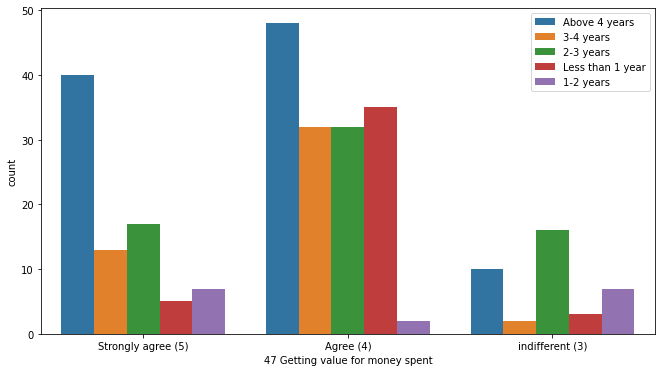

In [41]:
# plot with respect to how long a person has been shopping online.
plt.figure(figsize=(11,6))
sns.countplot(x=df['47 Getting value for money spent'],hue= df['5 Since How Long You are Shopping Online ?'])
plt.legend(loc='upper right')

# Observations: 
# 1. Out of the people who strongly-agree or agree that online shopping helps them get value for money spent, a high majority 
#    have been shopping online for atleast 2 years.

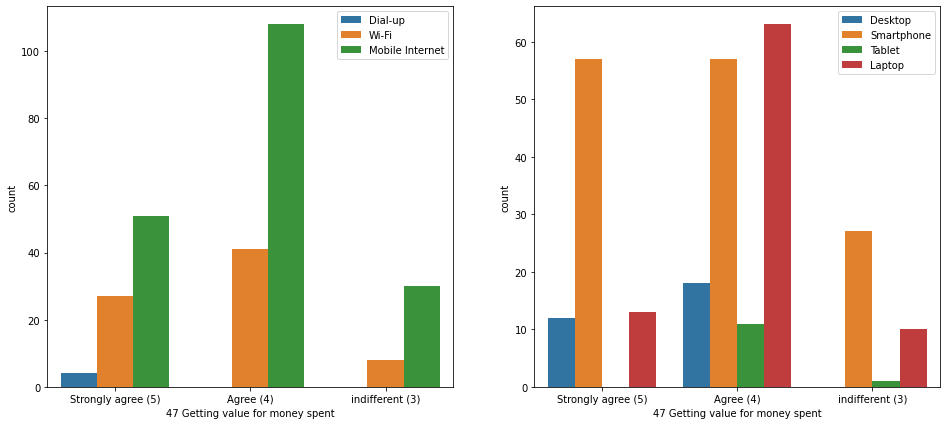

In [140]:
# plots with respect to internet connection type and device used.
df_cus_info= df[['7 How do you access the internet while shopping on-line?',
                 '8 Which device do you use to access the online shopping?']]
plt.figure(figsize=(16,7))
count=1
for i in df_cus_info.columns:
    plt.subplot(1,2,count)
    sns.countplot(x=df['47 Getting value for money spent'],hue= df[i])
    plt.legend(loc='upper right')
    count+=1
    
# Observations: 
# 1. Out of the people who strongly-agree or agree online shopping helps them get value for money spent, majority are mobile 
#    internet users followed by wifi users. They mainly use smartphone and laptop.

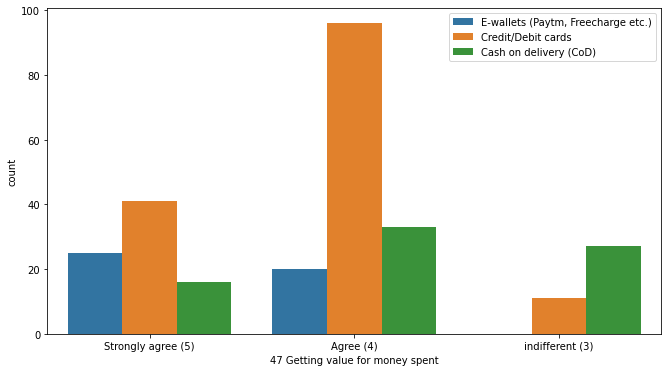

In [43]:
# plot with respect to preferred payment options.
plt.figure(figsize=(11,6))
sns.countplot(x=df['47 Getting value for money spent'],hue= df['15 What is your preferred payment Option?'])
plt.legend(loc='upper right')

# Observations: 
# 1. Out of the 231 people who strongly-agree or agree that online shopping helps them get value for money spent, around 135 
#    prefer credit/debit cards.
# 2. Around 50 prefer cash on delivery and less than 50 prefer e-wallets.

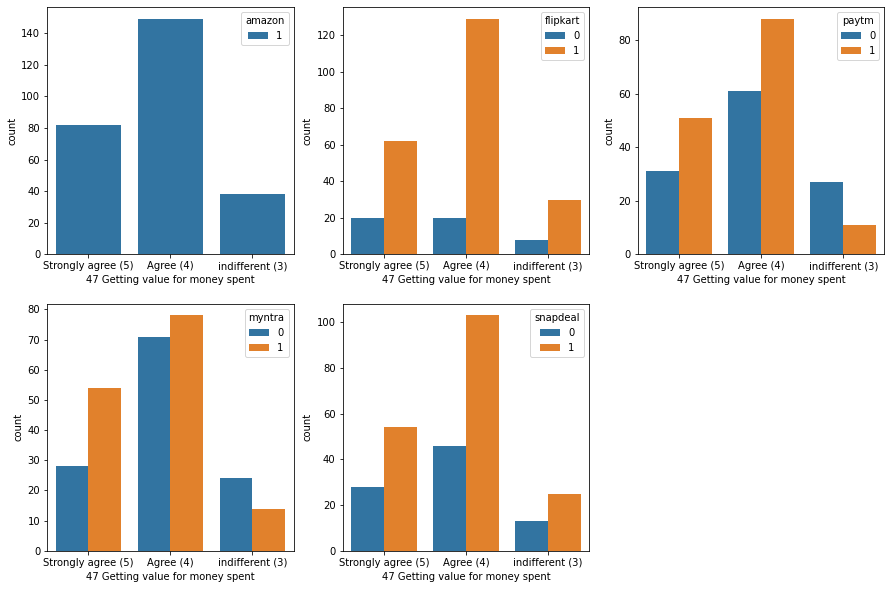

In [142]:
# plots with respect to which of the Indian online retailers they have shopped from.
df_encoded=encode_it('From the following, tick any (or all) of the online retailers you have shopped from;')
plt.figure(figsize=(15,10))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['47 Getting value for money spent'],hue= df_encoded[i])
    count+=1
    
# Observations:
# 1. All the respondents have shopping experience from amazon.
# 2. Out of the 231 people, a high majority(around 180) have shopping experience from flipkart.(231 people agree or strongly agree 
#    that online shopping helps them get value for money spent)
# 3. Out of the 231 people,around 130 people have shopping experience from paytm.
# 4. Out of the 231 people, around 130 people have shopping experience with myntra and around 150 with snapdeal.

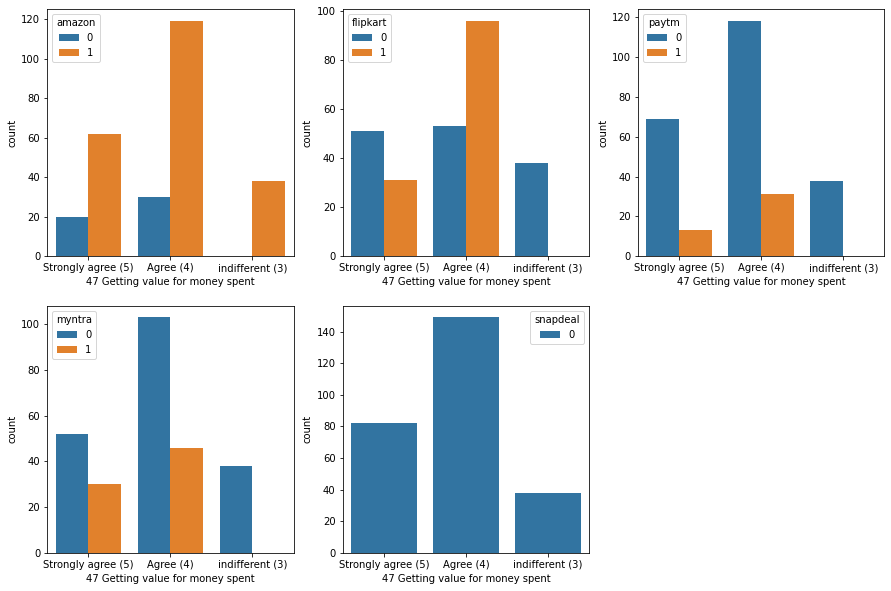

In [143]:
# plots with respect to which of the Indian online retailers they are likely to recommend a friend.
df_encoded=encode_it('Which of the Indian online retailer would you recommend to a friend?')
plt.figure(figsize=(15,10))
count=1
for i in df_encoded.columns:
    plt.subplot(2,3,count)
    sns.countplot(x=df['47 Getting value for money spent'],hue= df_encoded[i])
    count+=1
    
# Observations:
# 1. Out of the 231 people who strongly-agree or agree that online shopping helps them get value for money spent, around 180 people 
#    recommends amazon to a friend.
# 2. In case of flipkart, out of those 231 people, around 125 people recommend it to friends.
# 3. In case of myntra, out of those 231 people, around 70 recommend it to friends.
# 4. In case of paytm, less than 50.
# 5. It seems that no one is likely to recommend snapdeal to their friends.

In [ ]:
             ###################################### CONCLUSION ########################################
# 1. From the various visualizations and corresponding observations it can be said that ‘amazon.in’ is the most trusted and used 
#    e-commerce website followed by ‘flipkart.com’.

# 2. Since none of the customers is likely to recommend ‘snapdeal.com’ to their friends hence it can be said that ‘snapdeal.com’ is 
#  the least trusted website among the five we have analyzed.

# 3. More than 80% of the customers consider that online shopping is convenient and flexible, helps them in saving money, and also
#  get value out of the money they spend.

# 4. Customer satisfaction depends on a lot of factors which includes quality information, quality website/application, net benefit, 
#   trust, privacy, and return policy.

# 5. More than half the customers enjoy shopping online and it also gives them a sense of adventure.
